___
# HW # 7
##  Rohan Ponramesh


____

## Problem #1 (5)

Read [this](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) wiki page on multivariate normal distributions. Using Latex, write the probability distribution of a multivariate normal distribution.

$$ f(\mathbf{x}) = \frac{1}{(2\pi)^{n/2} \sqrt{\text{det}(\boldsymbol{\Sigma})}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\intercal \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right)$$


where 

 $\mathbf{x}$ n-dimensional vector representing the values of the random variables 

 $n$ The number of random variables

 $\boldsymbol{\mu}$ the mean vector

 $\boldsymbol{\Sigma}$ the covariance matrix

 $\text{det}(\boldsymbol{\Sigma})$ the determinant of the covariance matrix

 $\intercal$ represents the matrix transpose


____

## Problem #2 (20)

Imagine you are working for a credit card company, and assigned to detect fraudulent purchases. You are given two columns of data that you believe should be normally distributed, and want to detect any purchase that has a less than .1% chance of occuring for further investigation. 

In [126]:
import numpy as np
import matplotlib.pyplot as plt

First we will generate some fake data.

In [127]:
# set a seed so we get the same answer
np.random.seed(12345)

# generate data fake data from a multivariate normal distribution
num_points = 1000
my_mean = [0,0]
my_sigma = [[1,8],[1,7]]

fake_data = np.random.multivariate_normal(my_mean,my_sigma,num_points).T

/var/folders/rw/0tvxrjxd6xgg15ts3dc0z8p80000gn/T/ipykernel_17188/3181448687.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  fake_data = np.random.multivariate_normal(my_mean,my_sigma,num_points).T


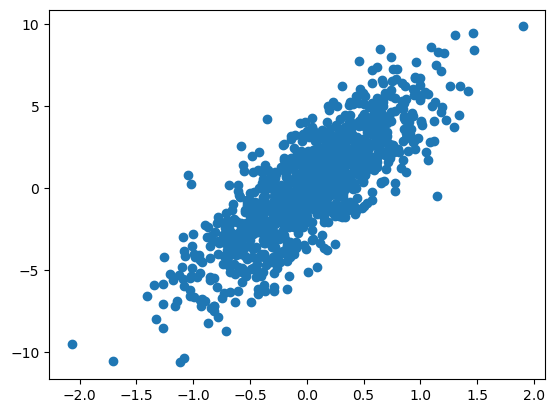

In [128]:
# Lets make a quick plot of the data.
plt.scatter(*fake_data);

In [129]:
# Find the mean of the data using numpy.
mu_ = np.mean(fake_data)
# Find the covariance matrix numpy.
sig_ = np.cov(fake_data)

In [130]:
mu_

0.06878114963787016

In [131]:
sig_

array([[ 0.28138112,  1.42753817],
       [ 1.42753817, 10.80042089]])

Print out the fitted mean and covariance. How do they compare with my_mean and my_sigma above? Do they match? Why do you think this is?

🤔

- No the  values of mu_ and sig_ is fairly close to the my_mean,my_sigma but not the same.

- It is expected to be slightly different due to the inherent randomness in the data generated using `numpy.random.multivariate_normal`.

---

In [132]:
# how many points to use in the x,y directions
xlen=100
ylen=100

x_ = np.linspace(-10,10,xlen)
y_ = np.linspace(-10,10,ylen)
xx, yy = np.meshgrid(x_, y_)


Code the equation for the PDF of a multivariate gaussian (from problem 1).

---



In [133]:
def gaussian(x,y,mu,sigma):
    # the x vector from the wiki page is r here.
    x = np.stack([x,y])
    d = 1
    x_minus_mean = x - mu
    cov_det = np.linalg.det(sigma)
    cov_inv = np.linalg.inv(sigma)

    exponent = -0.5 * np.dot(np.dot(x_minus_mean, cov_inv), x_minus_mean)

    prefactor = 1.0 / (np.sqrt((2 * np.pi) ** d * cov_det))

    pdf = prefactor * np.exp(exponent)

    return pdf

Fill in the values for z.

---

In [134]:
z = np.zeros((ylen,xlen))
for i in range(ylen):
    for j in range(xlen):
        z[i,j] = gaussian(xx[i,j], yy[i,j],mu_,sig_)
        

Text(0.5, 0, 'Feature 2')

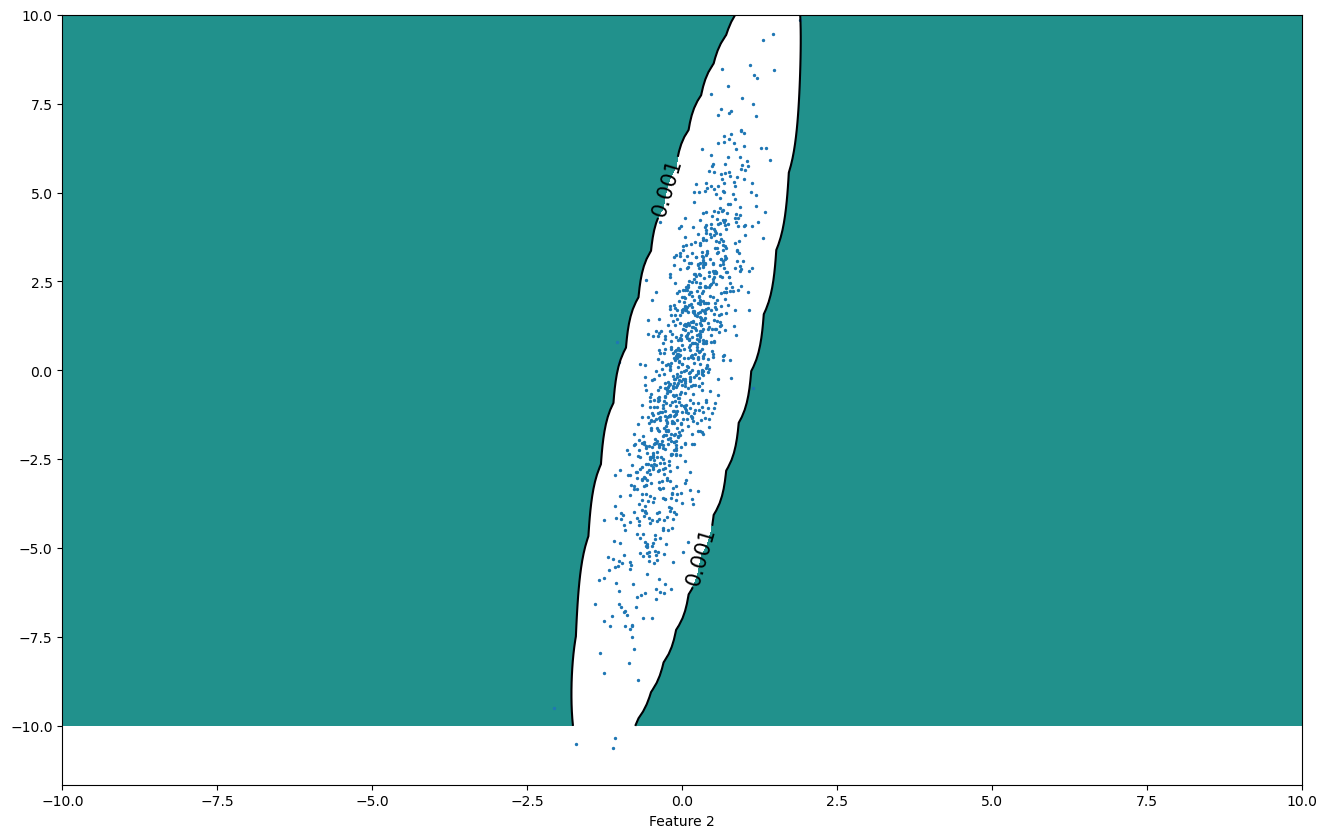

In [135]:
plt.figure(figsize=(16,10))
# create a contour line at .001.
CS = plt.contour(xx,yy,z,levels=[0,.001],cmap='magma_r')
plt.clabel(CS, fontsize=15,colors='black')

# make the filled contour plot here

plt.contourf(CS)

plt.scatter(*fake_data,s=2)
plt.xlabel('Feature 1')
plt.xlabel('Feature 2')

Are there points that lay outside of the contour? Play with the covariance matrix (my_sigma) and see how it changes the plot you made.

🤔

It is unlikely that there will be any points outside of the contour. The contour plot is generated based on the probability density function (PDF) of the Gaussian distribution. The contour levels represent regions of equal probability density, and all points within those contour levels are part of the distribution.

____

## Problem #3 (5)

Read [this](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) page on bootstrapping.



Bootstrapping is a statistical technique used for estimating the sampling distribution of a statistic or inferences about a population, even when the underlying data does not follow a known probability distribution. 

Here are the key aspects and concepts related to bootstrapping:

1. **Resampling with Replacement:** Bootstrapping involves repeatedly and randomly drawing samples (with replacement) from the original data set. The idea is to mimic the process of drawing random samples from the population.

2. **Sampling Distribution:** The primary goal of bootstrapping is to estimate the sampling distribution of a statistic. This distribution describes how the statistic would vary if we were to collect many random samples from the same population.

3. **Bootstrap Samples:** Each randomly drawn sample from the data set is referred to as a "bootstrap sample." These samples are typically the same size as the original data set and are drawn with replacement.

4. **Statistical Estimation:** Bootstrapping can be used for estimating various statistics, such as the mean, median, variance, standard deviation, correlation, or any other parameter of interest. By generating many bootstrap samples and calculating the statistic of interest for each sample, you can create an empirical distribution of that statistic.

5. **Confidence Intervals:** One common application of bootstrapping is to construct confidence intervals. These intervals provide a range of values within which the true population parameter is likely to fall with a specified level of confidence.

6. **Hypothesis Testing:** Bootstrapping can be used for hypothesis testing. You can generate bootstrap samples under different scenarios (e.g., null and alternative hypotheses) to assess the significance of observed effects.

7. **Assumption-Free:** Bootstrapping doesn't assume that the data follows a specific probability distribution, making it a valuable tool for non-parametric statistics and when dealing with real-world data that may not conform to theoretical distributions.

8. **Sample Size Impact:** The accuracy of bootstrapping results depends on the sample size. As the sample size increases, the reliability of bootstrapped estimates generally improves.


____

## Problem #4 (20)

We will fit many curves to data in this class, and often get a 'best fit'. The methods we use often do not provide information on how confident or uncertain we are in our fit. Here we will explore one method to create a band of uncertainty around our fit, called bootstrapping. In this problem we will implement an uncertainty band like the one seen in Seaborn's lmplot.



Let's start by generate noisy data on a line.

In [136]:
def line(x,m,b):
    return m*x + b

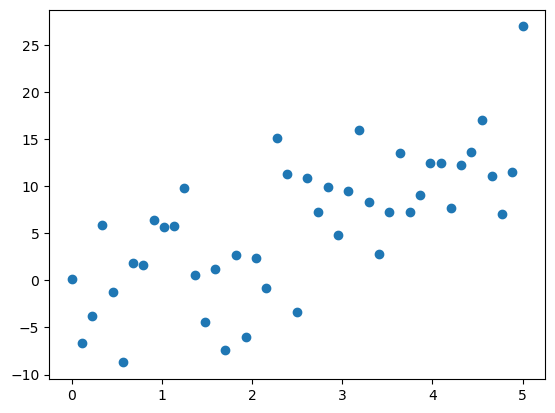

In [137]:
np.random.seed(2525)

# chose a number of points, a slope, and intercept
points = 45
my_m = 3
my_b = 0

x = np.linspace(0,5,points)

# code the equation of a line and add some normal noise to it (use mean 0 and std = 5)
y =  my_m*x+my_b+ np.random.normal(0,5,points)

# look at the data
plt.scatter(x,y)

Next we will select the number of lines we want to fit to our data and how many points we will use in each fit. In this case, points are slected with replacement.

In [138]:
# the number of lines to fit
number_of_fits = 100
# the number of points used in each fit
number_of_samples = 5

# set up some arrays to store our fit parameters
fit_ms = np.zeros(number_of_fits)
fit_bs = np.zeros(number_of_fits)


for f in range(number_of_fits):
    # select the random points
    random_locs = np.random.choice(range(points),number_of_samples)
    # place data in an X array and y vector
    x_bs = np.stack([np.ones(number_of_samples),x[random_locs]],axis=1)
    y_bs = y[random_locs]
    # solve using the normal equation
    
    fit_bs[f],fit_ms[f] = np.linalg.inv(x_bs.T@x_bs)@(x_bs.T@y_bs)

Now that we have fitted values for $m$ and $b$, we need to generate lines for each combination of parameters. To do this create an array with the size (number_of_fits,len(x)). Then loop through each of the pairs of fitted values and generate the corresponding line, and plot the line using `c='grey'` and `alpha=.3`.

To make the band, find the mean and standard deviation of the lines. Plot the mean, mean+std, mean-std. You can also use `plt.fill_between` to shade the region between the mean-std and mean+std.

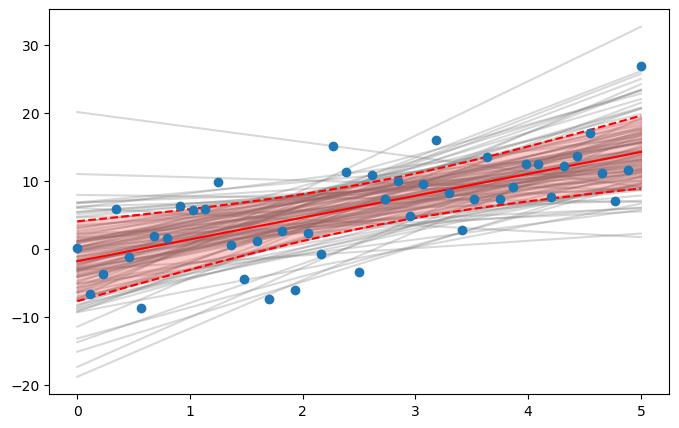

In [139]:
plt.figure(figsize=(8,5))

# create an array to store fits
fit_lines = np.zeros((number_of_fits,len(x)))

# loop through fitted values plot and save line
for i,m,b in zip(range(number_of_fits),fit_ms,fit_bs):
    fit_lines[i] = m*x+b
    plt.plot(x,fit_lines[i],c='grey',alpha=.3)

mean_fit=np.mean(fit_lines,axis=0)
std_fit=np.std(fit_lines,axis=0)

# plot the original data
plt.scatter(x,y,zorder=12)

# plot the mean of the fitted lines (HINT: you will need to use axis=0 in mean and std functions)
plt.plot(x,mean_fit,zorder=11,color='red')

lower_bound = mean_fit - std_fit
upper_bound = mean_fit + std_fit

# make +- std dashed lines
plt.plot(x,upper_bound,zorder=11,color='red',ls='--')
plt.plot(x,lower_bound,zorder=11,color='red',ls='--')

# fill in the space between mean+-std
plt.fill_between(x,mean_fit+std_fit,mean_fit-std_fit,color='red',alpha=.2,zorder=11)

How many of the grey lines fall inside the region between the mean line +- the standard deviation line? What shape is the region? Why is the region that shape? Does it make sense for the region to look like it does?

Play with my_m,my_b and the amount of noise you add to the data and see how the fits change.

In [140]:
print(len(fit_lines[0]))

45


In [141]:

total_lines=0
lines_in=0

for i in range(number_of_fits):
    lines=fit_lines[i]
    total_lines+=len(lines)
    lines_inside_region = lines[(lines >= lower_bound) & (lines <= upper_bound)]
    lines_in+=len(lines_inside_region)
    
print("Total fitlines ", total_lines,"number of lines inside ",lines_in)
                 
                       

Total fitlines  4500 number of lines inside  3202


 🤔 Total fitlines  4500 number of lines inside  3202

 🤔  The confidence band is looks Hyperbolic curve.
 
 🤔 Yes it makes sense, The band is closer near to the mean  value of the predictor and farther at the values minimum and maxiumum of the predictor